In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df= sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
print(df.columns.tolist())

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [10]:
df['pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

In [22]:
titanic=df[['survived','pclass','sex','age','sibsp','parch','alone','embark_town','fare']].copy()

<Axes: >

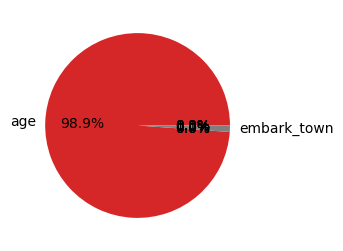

In [23]:
titanic.isnull().sum().plot(kind='pie',figsize=(8,3),autopct='%.1f%%')

fix missing value
- numeric:mean
- numeric:mode

avg_age=round(titanic['age].mean())

In [24]:
avg_age=round(titanic['age'].mean())
print(f'Average age:{avg_age:.1f}')

Average age:30.0


In [40]:
titanic['age'].fillna(avg_age,inplace=True)

In [39]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [35]:
titanic['embark_town'].value_counts().idxmax()

'Southampton'

In [44]:
most_freq_embark_town= titanic['embark_town'].value_counts().idxmax()
titanic['embark_town'].fillna(most_freq_embark_town,inplace=True)


In [43]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
alone          0
embark_town    0
fare           0
dtype: int64

# selection of column based on data

In [45]:
#only numerical columns from titanic dataframe
df.select_dtypes(include=np.number)

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,30.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [46]:
# textual column for dataframe
df.select_dtypes(include=object)

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no
...,...,...,...,...,...
886,male,S,man,Southampton,no
887,female,S,woman,Southampton,yes
888,female,S,woman,Southampton,no
889,male,C,man,Cherbourg,yes


In [48]:
df.select_dtypes(include='bool')

,adult_male,alone
0,True,False
1,False,False
2,False,True
3,False,False
4,True,True
...,...,...
886,True,True
887,False,True
888,False,False
889,True,True


In [50]:
titanic.describe(include=np.number)

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
titanic.describe(include=object)

,sex,embark_town
count,891,891
unique,2,3
top,male,Southampton
freq,577,646


In [60]:
#groupby pclass and count total survived
titanic.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

In [61]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [62]:
titanic.sort_values(by='age',ascending=False)

,survived,pclass,sex,age,sibsp,parch,alone,embark_town,fare
630,1,1,male,80.00,0,0,True,Southampton,30.0000
851,0,3,male,74.00,0,0,True,Southampton,7.7750
96,0,1,male,71.00,0,0,True,Cherbourg,34.6542
493,0,1,male,71.00,0,0,True,Cherbourg,49.5042
116,0,3,male,70.50,0,0,True,Queenstown,7.7500
...,...,...,...,...,...,...,...,...,...
831,1,2,male,0.83,1,1,False,Southampton,18.7500
469,1,3,female,0.75,2,1,False,Cherbourg,19.2583
644,1,3,female,0.75,2,1,False,Cherbourg,19.2583
755,1,2,male,0.67,1,1,False,Southampton,14.5000
